In [8]:
import pandas as pd 
import sqlite3       
con = sqlite3.connect('chinook.db') 
cursor = con.cursor()             
sql = "SELECT trackid,tracks.name,albums.Title AS album, media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Track ID','Track Name','Album Titles','Media Type','Genres'
  ])
df.to_csv('albums_type_table.csv',mode='w',index=False)
df

Entry successfully retrieved.


,Track ID,Track Name,Album Titles,Media Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [7]:
import pandas as pd
import sqlite3
con = sqlite3.connect('chinook.db')
cursor = con.cursor()
drop_sql = "DROP TABLE IF EXISTS albums_type"
sql = "CREATE TABLE albums_type (TrackID INTEGER, Track Name TEXT, Album Titles TEXT, Media Type TEXT, Genres TEXT)"
try:
    cursor.execute(drop_sql)
    cursor.execute(sql)
    con.commit()
    print("Table successfully created.")
except Exception as e:
    print("Exception occurred.",e)
cursor.close()
con.close()

Table successfully created.


In [9]:
import pandas as pd
import sqlite3
con = sqlite3.connect('chinook.db')
df = pd.read_csv('albums_type_table.csv')
df
df.to_sql('albums_type', con, if_exists='replace', index = False) 
con.close()
df

D:\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


,Track ID,Track Name,Album Titles,Media Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [3]:
import pandas as pd 
import sqlite3       
con = sqlite3.connect('chinook.db') 
cursor = con.cursor()            
sql = "SELECT Genres, COUNT(*) AS count FROM albums_type GROUP BY Genres ORDER BY count DESC LIMIT 10"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
result = cursor.fetchall()
print(type(result))
print(result)
print(pd.DataFrame(result)) 
print('\n')
df = pd.DataFrame(result, columns=[ 
'Genres','Count'
  ])
df.to_csv('albums_type_table.csv',mode='w',index=False)
df

Entry successfully retrieved.
<class 'list'>
[('Rock', 1297), ('Latin', 579), ('Metal', 374), ('Alternative & Punk', 332), ('Jazz', 130), ('TV Shows', 93), ('Blues', 81), ('Classical', 74), ('Drama', 64), ('R&B/Soul', 61)]
                    0     1
0                Rock  1297
1               Latin   579
2               Metal   374
3  Alternative & Punk   332
4                Jazz   130
5            TV Shows    93
6               Blues    81
7           Classical    74
8               Drama    64
9            R&B/Soul    61




,Genres,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


<ipython-input-27-c72eba39e8c7>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


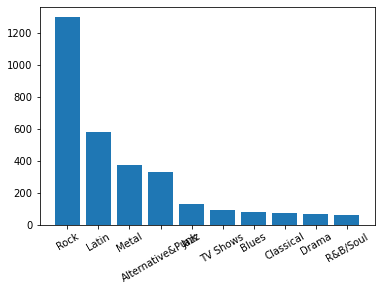

In [27]:
from matplotlib import pyplot as plt
albums_genres = ["Rock", "Latin", "Metal", "Alternative&Punk", "Jazz", "TV Shows","Blues","Classical","Drama","R&B/Soul"]
albums_count = [1297,579,374,332,130,93,81,74,64,61]
plt.bar(range(len(albums_genres)),albums_count)
# Create your ax object here
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(albums_genres, rotation=30)
plt.show()